# Optimization - Minimize Travelling Time

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective-Function-Creation-using-Ordinary-Least-Square-Regression-(OLS-R)-method" data-toc-modified-id="Objective-Function-Creation-using-Ordinary-Least-Square-Regression-(OLS-R)-method-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective Function Creation using Ordinary Least Square Regression (OLS-R) method</a></span></li><li><span><a href="#Objective-Function" data-toc-modified-id="Objective-Function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Objective Function</a></span></li><li><span><a href="#Monte-Carlo--Optimization" data-toc-modified-id="Monte-Carlo--Optimization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Monte Carlo  Optimization</a></span></li><li><span><a href="#Results-from-Monte-Carlo-Optimization" data-toc-modified-id="Results-from-Monte-Carlo-Optimization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Results from Monte-Carlo Optimization</a></span></li><li><span><a href="#Greedy-Hill-Climbing" data-toc-modified-id="Greedy-Hill-Climbing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Greedy Hill Climbing</a></span></li><li><span><a href="#Results-from-Greedy-Hill-climbing" data-toc-modified-id="Results-from-Greedy-Hill-climbing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Results from Greedy Hill climbing</a></span></li><li><span><a href="#Particle-swarm-optimization-(PSO)-with-Boundary-Constraints" data-toc-modified-id="Particle-swarm-optimization-(PSO)-with-Boundary-Constraints-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Particle swarm optimization (PSO) with Boundary Constraints</a></span></li><li><span><a href="#Results-from-PSO" data-toc-modified-id="Results-from-PSO-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Results from PSO</a></span></li><li><span><a href="#Conclsuion" data-toc-modified-id="Conclsuion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclsuion</a></span></li></ul></div>

## Objective Function Creation using Ordinary Least Square Regression (OLS-R) method

In [142]:
# Read simulation data using pandas
import pandas as pd
simulation_data = pd.read_csv('D:/MSC_DA_SEM_2/MSO/simulation_result.csv')

In [143]:
simulation_data

,total_blocks,total_trains_per_hour,total_driving_time,total_passengers_per_hour
0,4.0,7.0,3850.0,9339.0
1,5.0,7.0,4023.0,10299.0
2,6.0,8.0,4196.0,12027.0
3,7.0,8.0,4369.0,11979.0
4,8.0,9.0,4542.0,13122.0
5,9.0,9.0,4718.0,13146.0
6,10.0,10.0,4892.0,15030.0
7,11.0,11.0,5058.0,15531.0
8,12.0,11.0,5234.0,16278.0
9,13.0,9.0,6725.0,12999.0


<font size="3"> Linear Regression using sklearn for creating objective function

target variable - total_driving_time

predictor variable - total_blocks, total_trains_per_hour </font>

In [144]:
# Model predictor and target variable preparation
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np
target = pd.DataFrame(simulation_data['total_driving_time'])
predictor = pd.DataFrame(simulation_data[['total_blocks', 'total_trains_per_hour']])
predictor = sm.add_constant(predictor)

In [145]:
# fit model
model = sm.OLS(target, predictor).fit()

In [147]:
# summary of the model
pd.options.mode.chained_assignment = None
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_driving_time   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     539.2
Date:                Sun, 10 May 2020   Prob (F-statistic):           1.05e-11
Time:                        17:43:39   Log-Likelihood:                -88.163
No. Observations:                  14   AIC:                             182.3
Df Residuals:                      11   BIC:                             184.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4901.9146    337.519     14.523      0.000    4159.041    5644.788
total_blocks            403.5745     14.611     27.621      0.000     371.415     435.734
total_trains_per_hour  -401.2442     47.294     -8.484      0.000    -505.337    -297.151
==============================================================================
Omnibus:                        1.525   Durbin-Watson:                   2.338
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                0.825
Skew:                          -0.012   Prob(JB):                        0.662
Kurtosis:                       1.811   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Objective Function

<font size="3">It is observed that total blocks and number of trains p-value is < 0.05. So, both the predictor variables are statistically significant and contribute to the target variable and the equation is represented by

**Total_driving_time = 4901.9146 + 403.5745(total_blocks) - 401.2442(total_trains_per_hour)** </font>

## Monte Carlo  Optimization 

In [7]:
# Import neccessary packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np

<font size="3">
    
__x represents total number of blocks__

__y represents total trains per hour__

__4901.9146 is a constant (or) denotes slope of the model__
</font>

In [8]:
def f(x,y):
    return 4901.9146 + 403.5745*(x)-401.2442*(y)

In [9]:
#set random seed with 0
import random
random.seed(0)

In [10]:
# min-max number of blocks and trains are passed into monte carlo function
def monte_carlo(n, xmin=4, xmax=17, ymin=7, ymax=11):
    x = [ random.randint(xmin, xmax) for i in range(n)]
    y = [ random.randint(ymin, ymax) for i in range(n)]
    xp = [ x[0] ]
    yp = [ y[0] ]
    fmin = f(xp[0], yp[0])
    
    for i in range(1, len(x)):
        fi = f(x[i], y[i])

    # whenever a minimum value is found the fi became fmin and iterates
        if fi < fmin:
            xp += [x[i]]
            yp += [y[i]]
            fmin = fi

        xs = np.linspace(xmin, xmax, 100)
        ys = np.linspace(ymin, ymax, 100)
        xx, yy = np.meshgrid(xs, ys)
        z=f(xx, yy)
        
        fig, ax = plt.subplots(1, 1)
        fig.set_figwidth(6)
        fig.set_figheight(5)
        cs = ax.contourf(xs, ys, z, 100)
        fig.colorbar(cs, ax=ax)
        
        plt.scatter(x, y, c='red', marker='.')
        plt.plot(xp, yp, c='red')
        
        return len(xp), xp[-1], yp[-1], f(xp[-1], yp[-1])

(1, 4, 11, 2102.5263999999997)

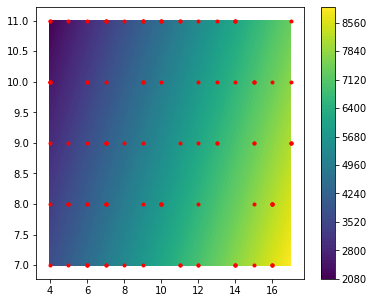

In [11]:
# set random seed and pass random value to n
random.seed(31)
monte_carlo(100)

(1, 8, 11, 3716.8243999999995)

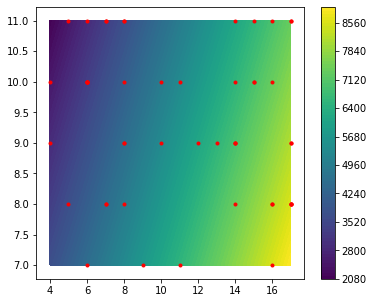

In [12]:
random.seed(13)
monte_carlo(50)

(1, 8, 9, 4519.3128)

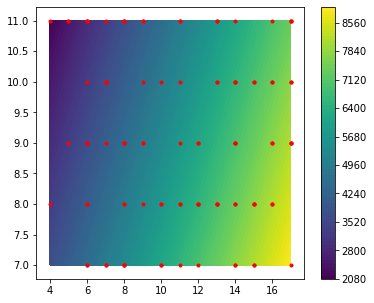

In [13]:
random.seed(13)
monte_carlo(100)

(1, 11, 9, 5730.0363)

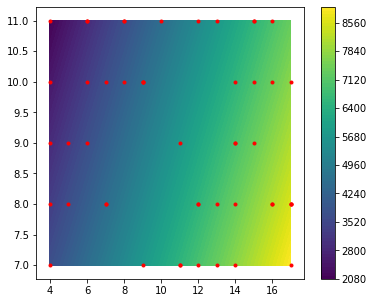

In [14]:
random.seed(40)
monte_carlo(50)

(1, 11, 7, 6532.5247)

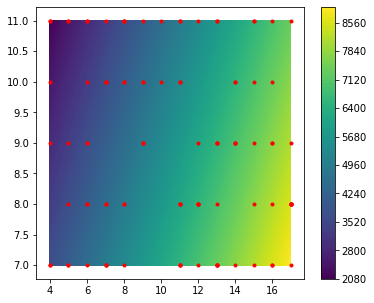

In [15]:
random.seed(40)
monte_carlo(100)

## Results from Monte-Carlo Optimization

<font size="3"> By varying seed and n value, different optimal values of (nopt, kopt) with minimum travelling time is obtained. From the above 4 graphs, it is observed that

1) When seed(31) and n(100) gives (nopt, kopt, minTarvellingTime) - (4, 11, 2102.5263999999997)

2) When seed(13) and n(50) gives (nopt, kopt, minTarvellingTime)  -  (8, 11, 3716.8243999999995)

3) When seed(13) and n(100) gives (nopt, kopt, minTarvellingTime) -  (8, 9, 4519.3128)

4) When seed(40) and n(100) gives (nopt, kopt, minTarvellingTime) -  (11, 7, 6532.5247)

Out of 4 different values of seed and n, __(8, 9, 4519.3128)__ is the optimal solution and closest to the actual data of (8, 9, 4542).

By varying different values, we can obtain different results with more number of trains and lesser travelling time. </font>

## Greedy Hill Climbing

In [16]:
import random
random.seed(0)

In [17]:
# set neighbours in all 8 possible directions with default value k =1
def neighbours(x, y, xmin, xmax, ymin, ymax, K=1):
    return \
        [ (x+i, y) for i in range(-K, K+1) \
                    if i!=0 and xmin<=x+i and x+i<=xmax ] + \
        [ (x, y+i) for i in range(-K, K+1) \
                    if i!=0 and ymin<=y+i and y+i<=xmax ] + \
        [ (x+i, y+i) for i in range(-K, K+1) \
                    if i!=0 and xmin<=x+i and x+i<=xmax and ymin<=y+i and
y+i<=ymax ] + \
        [ (x+i, y-i) for i in range(-K, K+1) \
                        if i!=0 and xmin<=x+i and x+i<=xmax and ymin<=y-i and
y-i<=ymax ]

In [18]:
def greedy_hill_climbing(xmin=4, xmax=17, ymin=7, ymax=11, K=1, log=False):
    
    x0 = random.randint(xmin, xmax)
    y0 = random.randint(ymin, ymax)

    xp = [ x0 ]
    yp = [ y0 ]
    fmax = f(x0, y0)
    
    if log:
        print (f"{' x'} {' y'} {'f(x, y)':>9s}")
        print(f"{x0:2d} {y0:2d} {fmax:9.3f}")

    while True:
        xi = xp[-1]
        yi = yp[-1]
        fi = fmax

        # pick the best point from the neighbouthood
        for (x, y) in neighbours(xi, yi, xmin, xmax, ymin, ymax, K):
            ff = f(x, y)
            if ff < fi:
                xi = x
                yi = y
                fi = ff

        if fi < fmax:
            # terminate if no improvement found and assign lowest value as fmax through iteration
            fmax = fi
            xp += [xi]
            yp += [yi]
            break
            
        if log:
            print(f"{xi:2d} {yi:2d} {fi:9.3f}")

    # generate contour plot of f
    xs = np.linspace(xmin, xmax, 100)
    ys = np.linspace(ymin, ymax, 100)
    xx, yy = np.meshgrid(xs, ys)
    z=f(xx, yy)
    
    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(6)
    fig.set_figheight(5)
    cs = ax.contourf(xs, ys, z, 100)
    fig.colorbar(cs, ax=ax)

    # display the points considered
    plt.scatter(xp, yp, c='red', marker='.')
    
    # overlay with the path choosen
    plt.plot(xp, yp, c='red', lw=1)
    return len(xp), xp[-1], yp[-1], f(xp[-1], yp[-1])

(2, 4, 11, 2102.5263999999997)

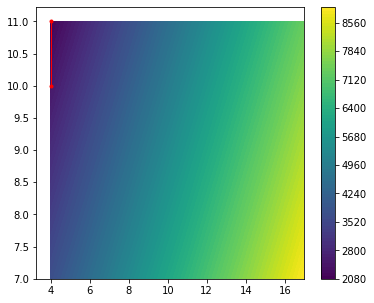

In [19]:
random.seed(31)
greedy_hill_climbing()

(2, 4, 17, -304.9387999999999)

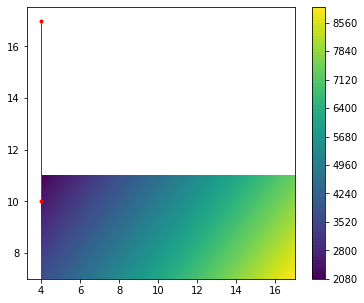

In [20]:
random.seed(31)
greedy_hill_climbing(K=100)

(2, 7, 10, 3714.4941)

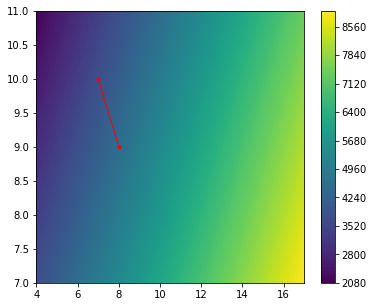

In [21]:
random.seed(13)
greedy_hill_climbing()

(2, 8, 17, 1309.3591999999999)

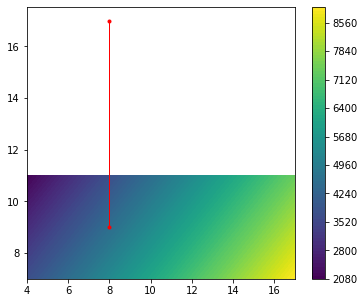

In [22]:
random.seed(13)
greedy_hill_climbing(K=50)

(2, 8, 17, 1309.3591999999999)

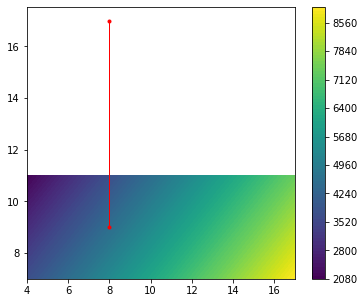

In [23]:
random.seed(13)
greedy_hill_climbing(K=100)

(2, 10, 11, 4523.973399999999)

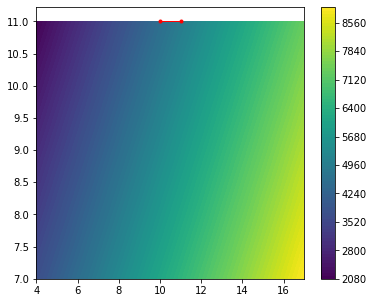

In [24]:
random.seed(40)
greedy_hill_climbing()

(2, 4, 11, 2102.5263999999997)

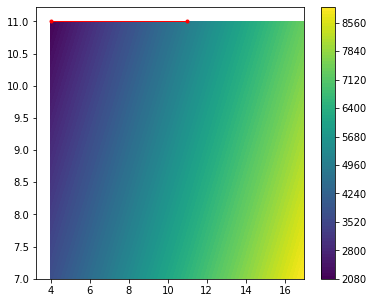

In [25]:
random.seed(40)
greedy_hill_climbing(K=100)

## Results from Greedy Hill climbing

<font size="3"> 
From the above graphs the following results are observed.

1) when seed(31) and K(null) then (nopt, kopt, minTarvellingTime) - (4, 11, 2102.5263999999997)

2) when seed(31) and K(100) then (nopt, kopt, minTarvellingTime) - (2, 4, 17, -304.9387999999999) 
is non-feasible solution

3) When seed(13) and K(null) gives (nopt, kopt, minTarvellingTime) - (7, 10, 3714.4941)

4) When seed(13) and K(50) gives (nopt, kopt, minTarvellingTime) - (8, 17, 1309.3591999999999)

5) When seed(13) and K(100) gives (nopt, kopt, minTarvellingTime) - (8, 17, 1309.3591999999999)

6) When seed(40) and K(null) gives (nopt, kopt, minTarvellingTime) - (10, 11, 4523.973399999999)

7) When seed(40) and K(100) gives (nopt, kopt, minTarvellingTime) - (4, 11, 2102.5263999999997)

Out of 7 different combination of seed and K, __(10, 11, 4523.973399999999)__ is the optimal and closest to the actual solution of (10, 10, 4892) 
</font>

## Particle swarm optimization (PSO) with Boundary Constraints

In [139]:
from pyswarm import pso

In [148]:
# PSO Optimization function
def particle_swarm_optimization(x):
    x1 = x[0]
    x2 = x[1]
    return 4901.9146 + 403.5745*(x1)-401.2442*(x2)

In [154]:
# lower & upper bound constraints
lb = [4, 7]
ub = [17, 11]

# Optimized simulation for 100 iterations gives optimal value of n and k
xopt, fopt = pso(particle_swarm_optimization, lb, ub, swarmsize=100, omega=0.3, phip=0.3, phig=0.5, maxiter=100, minstep=1e-8,
    minfunc=1e-3, debug=True)

No constraints given.
New best for swarm at iteration 1: [4.50324444 9.64864856] 2847.8449501085247
New best for swarm at iteration 1: [ 5.12126995 10.69160605] 2678.7836433834836
New best for swarm at iteration 1: [ 4. 11.] 2102.5263999999997
Best after iteration 1: [ 4. 11.] 2102.5263999999997
Best after iteration 2: [ 4. 11.] 2102.5263999999997
Best after iteration 3: [ 4. 11.] 2102.5263999999997
Best after iteration 4: [ 4. 11.] 2102.5263999999997
Best after iteration 5: [ 4. 11.] 2102.5263999999997
Best after iteration 6: [ 4. 11.] 2102.5263999999997
Best after iteration 7: [ 4. 11.] 2102.5263999999997
Best after iteration 8: [ 4. 11.] 2102.5263999999997
Best after iteration 9: [ 4. 11.] 2102.5263999999997
Best after iteration 10: [ 4. 11.] 2102.5263999999997
Best after iteration 11: [ 4. 11.] 2102.5263999999997
Best after iteration 12: [ 4. 11.] 2102.5263999999997
Best after iteration 13: [ 4. 11.] 2102.5263999999997
Best after iteration 14: [ 4. 11.] 2102.5263999999997
Best afte

In [153]:
# (kopt, nopt, opt.travelling time)
xopt, fopt

(array([ 4., 11.]), 2102.5263999999997)

## Results from PSO

<font size="3"> For running 100 iterations, the optimal travelling time is 2102.56 seconds with 4 blocks and 11 trains __(4, 11, 2102.5263999999997)__. Also default values of hyperparameters such as swarmsize, omega, maxiter, minstep are set to default value of 100, 0.5, 100, 1e-8 [3]. The upper and lower limits from the datasets are passed for ub and lb. </font>

## Conclsuion


<font size="3"> 
* On Comparing two metaheuristic models, Monte-Carlo optimization gives a value of __(8, 9, 4519.3128)__ and Greedy Hill climbing value of __(10, 11, 4523.973399999999)__. 

* In case of Monte-Carlo when a seed is constant and changing the value of N, the number of blocks remains constant but the train count is varying. 

* In Greedy Hill climbing even though random seed kept constant when K-value is tuned both numbers of trains and total blocks vary. 

* PSO optimization results are not as effective as metaheuristics models for minimizing travelling time.

* Monte-Carlo gives a better feasible solution than Greedy Hill climbing and PSO optimizations.  The travelling time approximately equals the actual data. For this optimization, it can be concluded that Monte-Carlo suits better.
</font>